In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
import pandas as pd
import netCDF4 as nc
import cdo

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
new_file = nc.MFDataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output01[0-3]/ocean.nc')
ssh = new_file.variables['sea_level'][:]
lat = new_file.variables['yt_ocean'][:]
lon = new_file.variables['xt_ocean'][:]
lon.shape

(3600,)

In [4]:
m_ssh = np.mean(ssh,axis=0) 
ssh_std = np.std(ssh,axis=0) 
ssh_std.shape

(2700, 3600)

In [5]:
lon_std = lon

In [6]:
m_ssh, lon = shiftgrid(0, m_ssh, lon, start=True)

In [7]:
ssh_std, lon_std = shiftgrid(0, ssh_std, lon_std, start=True)

In [8]:
new_file.close()

In [9]:
obs_file = nc.Dataset('/g/data1/v45/fw4078/obs-data/zos_AVISO_L4_199210-201012.nc')
ssh_obs = obs_file.variables['zos'][3:]
lat_obs = obs_file.variables['lat'][:]
lon_obs = obs_file.variables['lon'][:]
ssh_obs.shape

(216, 180, 360)

In [10]:
m_ssh_obs = np.mean(ssh_obs,axis=0)
ssh_std_obs = np.std(ssh_obs,axis=0)

Text(0.5,1,'AVISO SSH std.')

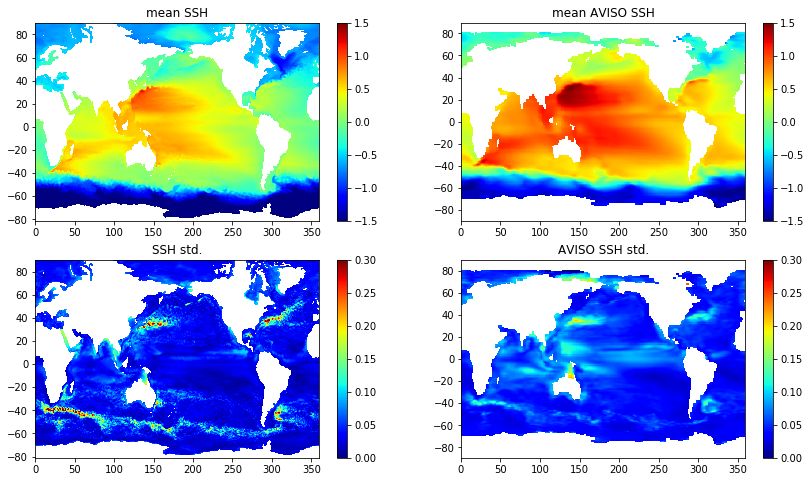

In [11]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2, 2, 1)
cax1 = ax1.pcolormesh(lon, lat, m_ssh, shading='flat', cmap=plt.cm.jet, vmin=-1.5, vmax=1.5)
fig.colorbar(cax1)
#cbar.outline.set_linewidth(1)
plt.title('mean SSH', fontsize=12)

ax2 = fig.add_subplot(2, 2, 2)
cax2 = ax2.pcolormesh(lon_obs, lat_obs, m_ssh_obs, shading='flat', cmap=plt.cm.jet, vmin=-1.5, vmax=1.5)
fig.colorbar(cax2)
#cbar.outline.set_linewidth(1)
plt.title('mean AVISO SSH', fontsize=12)

ax3 = fig.add_subplot(2, 2, 3)
cax3 = ax3.pcolormesh(lon, lat, ssh_std, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=0.3)
fig.colorbar(cax3)
#cbar.outline.set_linewidth(1)
plt.title('SSH std.', fontsize=12)

ax4 = fig.add_subplot(2, 2, 4)
cax4 = ax4.pcolormesh(lon_obs, lat_obs, ssh_std_obs, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=0.3)
fig.colorbar(cax4)
#cbar.outline.set_linewidth(1)
plt.title('AVISO SSH std.', fontsize=12)